# Detecting Credit Card Fraud based on Amount spent (point anomaly)

## Import Libraries

In [2]:
import pandas as pd 
from pandas import read_csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
fileName = "/content/gdrive/MyDrive/CreditCardFraudDetection/creditcard.csv"
dataset = pd.read_csv(fileName)

In [5]:
print(dataset.shape)
print(dataset.head(20))
print(dataset.describe())

(284807, 31)
    Time        V1        V2        V3  ...       V27       V28  Amount  Class
0    0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1    0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2    1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3    1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4    2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0
5    2.0 -0.425966  0.960523  1.141109  ...  0.253844  0.081080    3.67      0
6    4.0  1.229658  0.141004  0.045371  ...  0.034507  0.005168    4.99      0
7    7.0 -0.644269  1.417964  1.074380  ... -1.206921 -1.085339   40.80      0
8    7.0 -0.894286  0.286157 -0.113192  ...  0.011747  0.142404   93.20      0
9    9.0 -0.338262  1.119593  1.044367  ...  0.246219  0.083076    3.68      0
10  10.0  1.449044 -1.176339  0.913860  ...  0.042850  0.016253    7.80      0
11  10.0  0.384978  0.616109 -0.874300 

In [6]:
dataset.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

## Find Percentage of Not Fraud transaction Data

1.dataset[‘Class’] = 0 Not a fraud,
2.dataset[‘Class’] = 1 Fraud

In [7]:
nfcount=0
notFraud=dataset['Class']

for i in range(len(notFraud)):
  if notFraud[i]==0:
    nfcount=nfcount+1
    nfcount    
per_nf=(nfcount/len(notFraud))*100
print('percentage of total not fraud transaction in the dataset: ',per_nf)

percentage of total not fraud transaction in the dataset:  99.82725143693798


## Find Percentage of Fraud transaction Data

In [8]:
fcount=0
Fraud=dataset['Class']
for i in range(len(Fraud)):
  if Fraud[i]==1:
    fcount=fcount+1

fcount    
per_f=(fcount/len(Fraud))*100
print('percentage of total fraud transaction in the dataset: ',per_f)

percentage of total fraud transaction in the dataset:  0.1727485630620034


## Plot Fraud transaction vs Non-Fraud transaction
### Plot Amount Vs Time:

Text(0.5, 1.0, 'Time Vs amount')

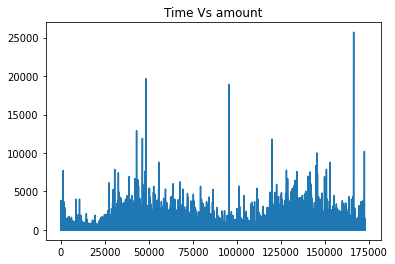

In [9]:
x=dataset['Time']
y=dataset['Amount']
plt.plot(x, y) 
plt.title('Time Vs amount')

## Plot Amount Distribution Curve:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


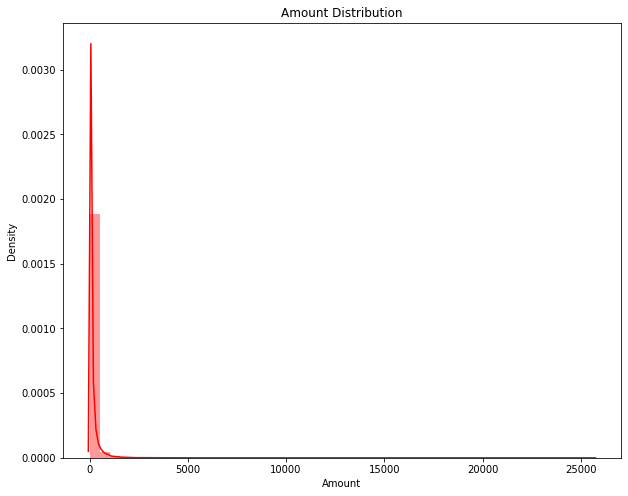

In [10]:
plt.figure(figsize=(10,8), )
plt.title('Amount Distribution')
sns.distplot(dataset['Amount'],color='red');

## Correlation between all attribute

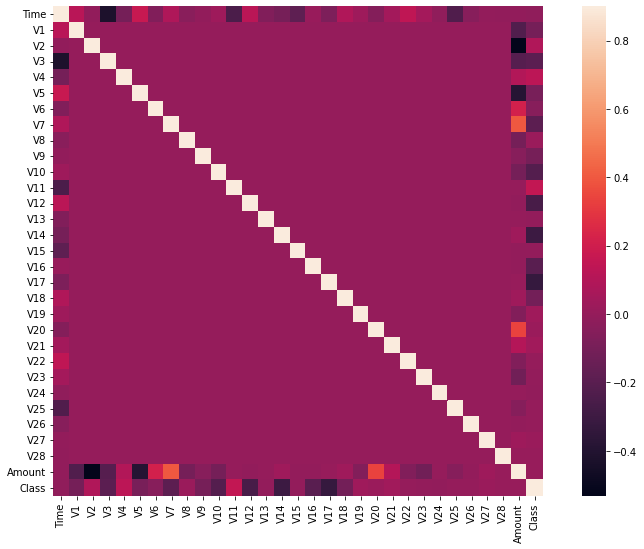

In [11]:
correlation_metrics = dataset.corr() 
fig = plt.figure(figsize = (14, 9))
sns.heatmap(correlation_metrics, vmax = .9, square = True)
plt.show()

In [12]:
x=dataset.drop(['Class'], axis = 1)#drop the target variable
y=dataset['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression
linear =LinearRegression()
linear.fit(xtrain, ytrain)

LinearRegression()

In [16]:
y_pred = linear.predict(xtest)
table= pd.DataFrame({"actual":ytest," predicted":y_pred})
table

,actual,predicted
43428,1,1.218185
49906,0,-0.000578
29474,0,-0.000726
276481,0,0.002957
278846,0,-0.001548
...,...,...
75723,0,-0.004392
252263,0,-0.000725
221246,0,0.001325
81910,0,0.001081
